<a href="https://colab.research.google.com/github/stefanoridolfi/Coding_ML/blob/master/MLP_1_hidden_3_output_stefano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

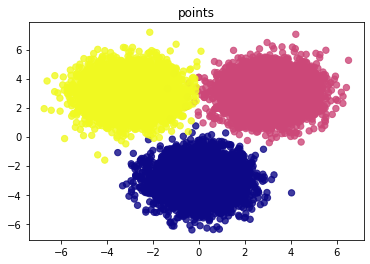

Epoch= 0    Loss function value:  0.009309514069738243
Epoch= 1    Loss function value:  0.0038649281614228795
Epoch= 2    Loss function value:  0.0023759959422143553
Epoch= 3    Loss function value:  0.0017041699871586313
Epoch= 4    Loss function value:  0.0013273401170809588
Epoch= 5    Loss function value:  0.0010882510983581898
Epoch= 6    Loss function value:  0.0009239122079159933
Epoch= 7    Loss function value:  0.0008044201546171839
Epoch= 8    Loss function value:  0.0007138659376430745
Epoch= 9    Loss function value:  0.0006430594750808926
Epoch= 10    Loss function value:  0.000586347986370753
Epoch= 11    Loss function value:  0.000540075595327422
Epoch= 12    Loss function value:  0.0005017760509296194
Epoch= 13    Loss function value:  0.00046972129507382495
Epoch= 14    Loss function value:  0.00044265461994756513
Epoch= 15    Loss function value:  0.00041962538893256635
Epoch= 16    Loss function value:  0.00039988339822596915
Epoch= 17    Loss function value:  0.000

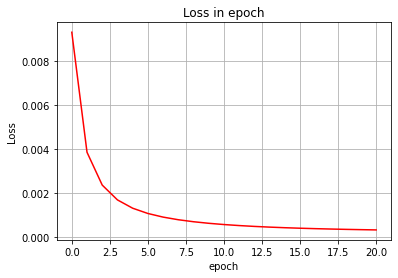

accuracy= 99.87  corrected 4493 over 4499  errors= 6 epoche= 20


In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(4)

################Input
attributes = 2
hidden_nodes = 10
output_labels = 3
lr = 10e-3
epoches=20
split=0.7
l=5000
modulo=1
# Numero totale istanze l*3
# Numero istanze training l*3*split
# Numero totale istanze test L+3(1-split)
#############################################


cat_images = np.random.randn(l, 2) + np.array([0, -3])
mouse_images = np.random.randn(l, 2) + np.array([3, 3])
dog_images = np.random.randn(l, 2) + np.array([-3, 3])
feature_set = np.vstack([cat_images, mouse_images, dog_images])
labels = np.array([0]*l + [1]*l + [2]*l)


one_hot_labels = np.zeros((l*3, 3))
for i in range(l*3):
    one_hot_labels[i, labels[i]] = 1
dataset=np.concatenate((feature_set,one_hot_labels),axis=1)



plt.scatter(dataset[:,0], dataset[:,1], c=labels,cmap='plasma', s=40, alpha=0.8)
plt.title("points")
plt.show()
np.random.shuffle(dataset)
instances = dataset.shape[0]

dataset_train=dataset[0:int(split*instances),:]
dataset_test=dataset[int(split*instances)+1:instances,:]

#----------------------------------#
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum()

def classific(V):
  return np.argmax(V)
    
def accuracy_m(actual, predicted,ao_list):
  correct=0
  for i in range(len(actual)):
    if actual[i]==predicted[i]:
      correct+=1
    #else:
    #  print("error:",i,"  ",ao_list[i],"  actual=",actual[i],"  predicted=",predicted[i])
    accuracy=(correct/float(len(actual)))*100
  return accuracy, correct,len(actual)



wh = np.random.rand(attributes,hidden_nodes)
bh = np.random.randn(1,hidden_nodes)

# wo=[hid,m]
#bo=[1,1]
wo = np.random.rand(hidden_nodes,output_labels)
bo = np.random.randn(1,output_labels)


error_cost = []
epoch_list=[]
ao_list=[]
for epoch in range(epoches+1):
  epoch_list.append(epoch)
############# feedforward

  for i in range(int(split*instances)):
    #Y=one_hot_labels[i,:]
    Y=dataset_train[i,2:5]
    Y=np.array(Y)
    np.reshape(Y,(1,3))
    X=dataset_train[i,0:2]
    X=np.array(X)
    X=X.reshape(1,attributes)
  
    # Phase 1
    zh = np.dot(X, wh) + bh
    zh=zh.reshape(1,hidden_nodes)
    ah = sigmoid(zh)
    
    # Phase 2
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)
    ao_list.append(ao)
    #print("zo=",zo,"   ao=",ao, "one-hot label[i]",one_hot_labels[i])
   
  
########## Back Propagation

########## Phase 1
    d_bo=ao-Y
    d_wo = np.dot(ah.T,d_bo)
    ########## Phases 2
    d_bh=sigmoid_der(zh)*(np.dot(d_bo,wo.T))
    d_wh=np.dot(X.T,d_bh)
    # Update Weights ================
    wh -= lr * d_wh
    bh -= lr * d_bh
    wo -= lr * d_wo
    bo -= lr * d_bo
  
    loss =(-Y* np.log(ao)).sum()
    
  
  #print("fine epoch", epoch, '    Loss function value: ', loss)
  error_cost.append(loss)
  if epoch % modulo == 0:
    print("Epoch=",epoch, '   Loss function value: ', loss)

fig, ax = plt.subplots()
ax.plot(epoch_list, error_cost, c='red')
ax.set(xlabel='epoch', ylabel='Loss',
       title='Loss in epoch')
plt.grid(True)
plt.show()
predicted=[]
actual=[]
for i in range(dataset_test.shape[0]):
  Y=dataset_test[i,2:5]
  Y=np.array(Y)
  Y=Y.reshape(1,3)
  actual.append(classific(Y))
  X=dataset_test[i,0:2]
  X=np.array(X)
  X=X.reshape(1,attributes)

  # Phase 1
  zh = np.dot(X, wh) + bh
  zh=zh.reshape(1,hidden_nodes)
  ah = sigmoid(zh)
    
  # Phase 2
  zo = np.dot(ah, wo) + bo
  ao = softmax(zo)
  predicted.append(classific(ao))
  #f classific(ao)!=classific(Y):
  #  print("i=",i,"   ao",ao,"Y",Y,"actual",classific(Y),"predicted",classific(ao))
  
acc, corrected, istannce_test =accuracy_m(actual, predicted,ao_list)

print("accuracy= %2.2f  corrected %d over %d  errors= %d epoche= %d" % (acc,corrected,istannce_test,istannce_test-corrected, epoches ))


